In [1]:
import numpy as np
np.random.seed(88889999)

from graspy.inference import LatentPositionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

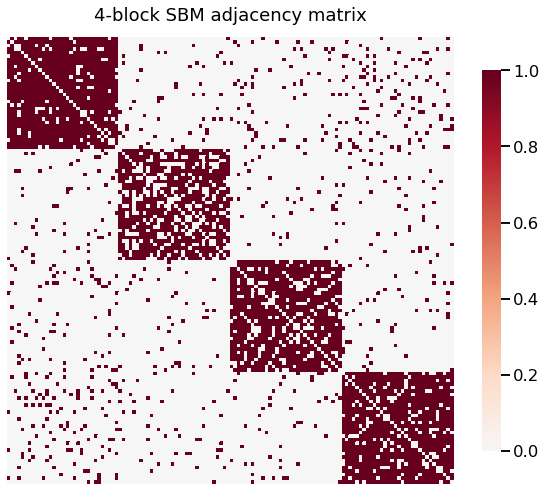

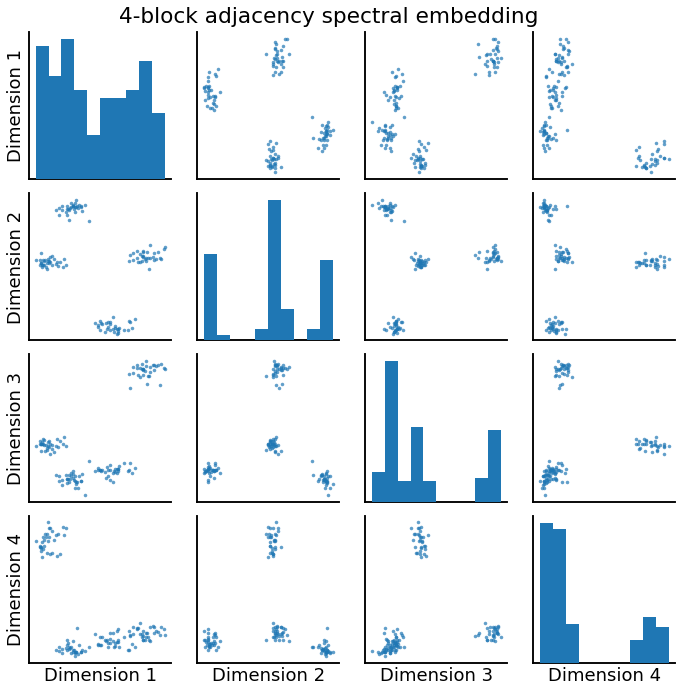

In [2]:
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize = [32] * 4
A = sbm(csize, P)
X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
heatmap(A, title='4-block SBM adjacency matrix')
pairplot(X, title='4-block adjacency spectral embedding')

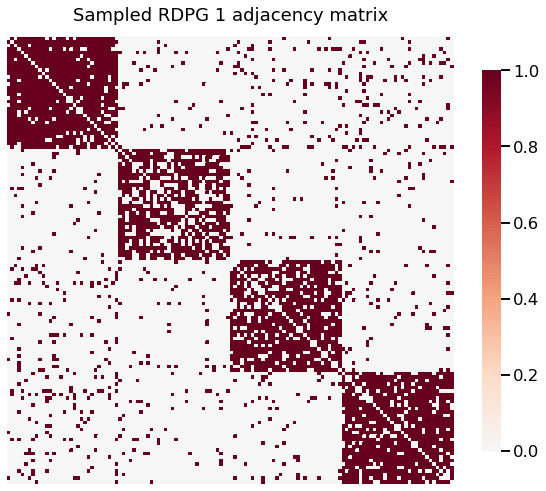

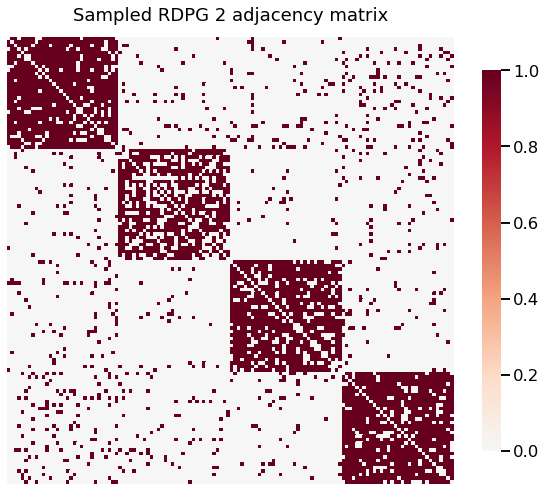

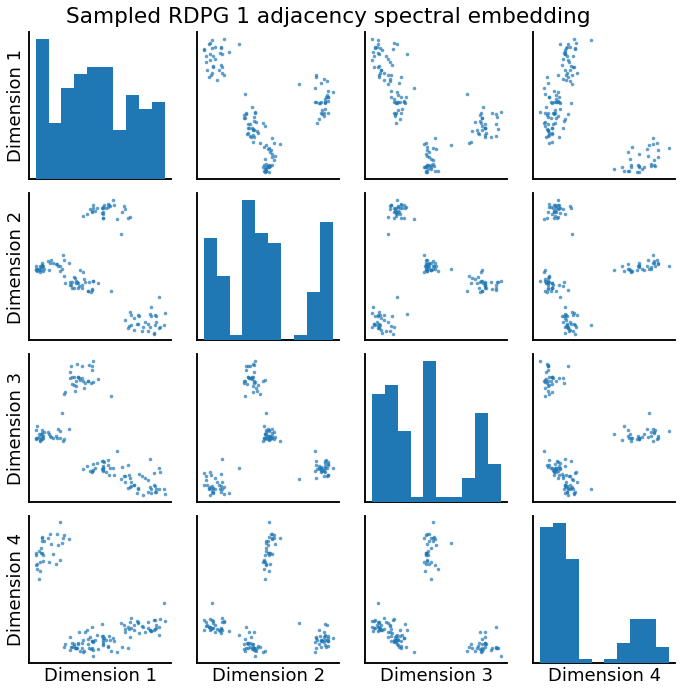

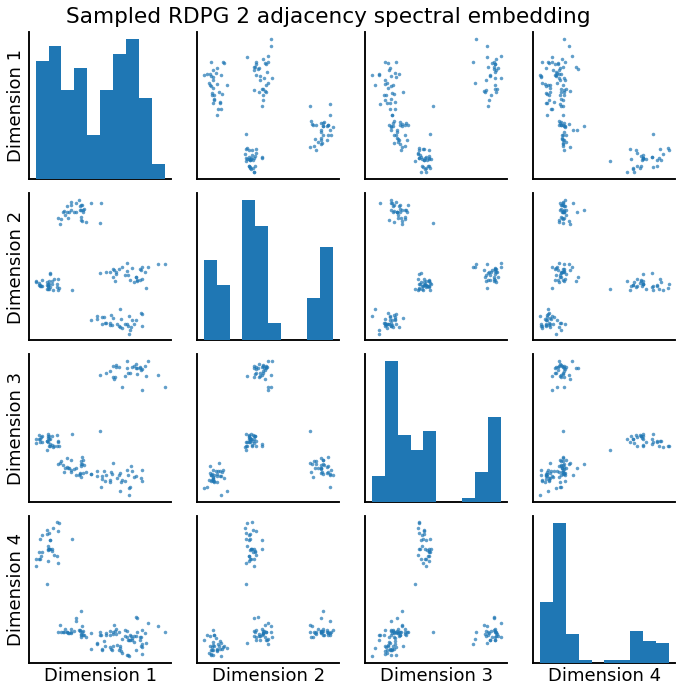

In [4]:
A1 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)
A2 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)

Xhat1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
Xhat2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

heatmap(A1, title='Sampled RDPG 1 adjacency matrix')
heatmap(A2, title='Sampled RDPG 2 adjacency matrix')
pairplot(Xhat1, title='Sampled RDPG 1 adjacency spectral embedding')
pairplot(Xhat2, title='Sampled RDPG 2 adjacency spectral embedding')

In [5]:
# note: may want to use more bootstraps in practice, low number used here is for speed
lpt = LatentPositionTest(n_bootstraps=100, n_components=n_components)
lpt.fit(A1, A2)
print('p = {}'.format(lpt.p_value_))

p = 0.801980198019802


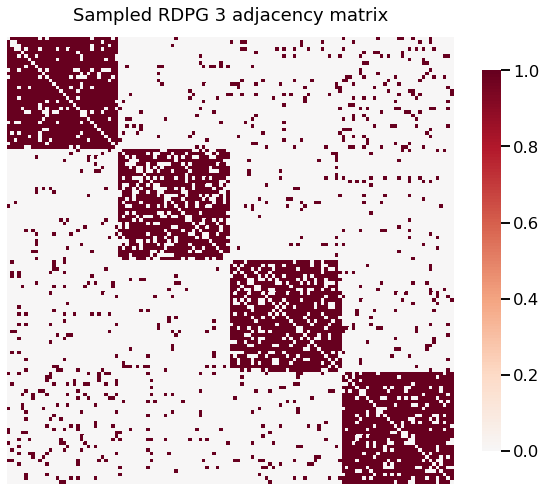

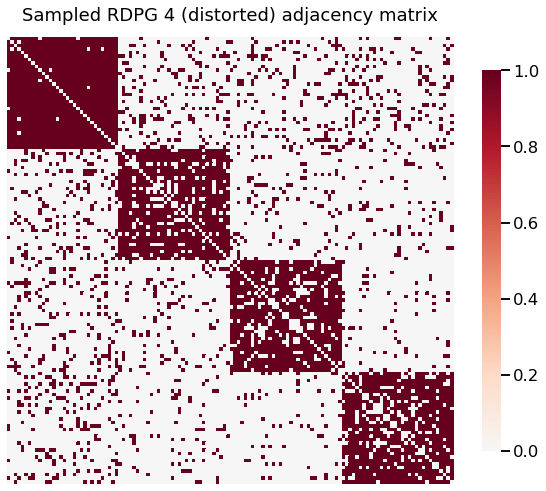

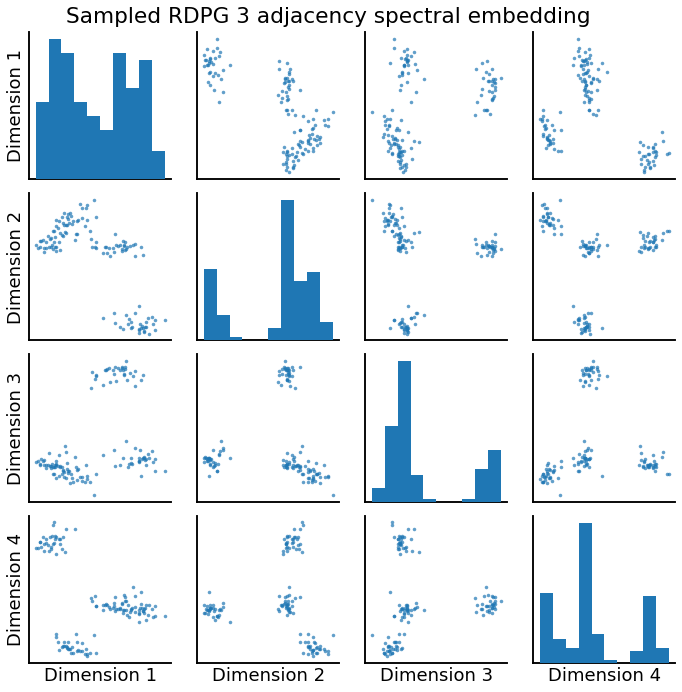

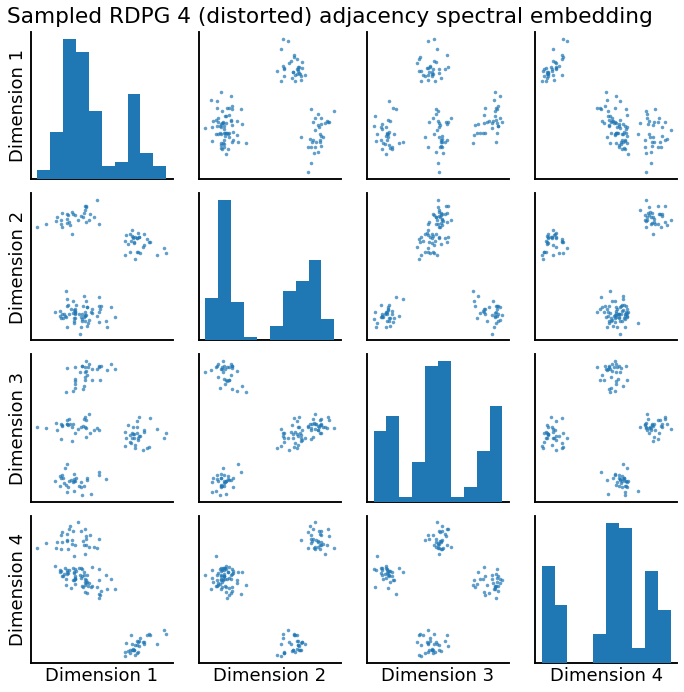

In [6]:
A3 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)
A4 = rdpg(X + np.random.normal(0.05, 0.02, size=(X.shape)),
          loops=False,
          rescale=False,
          directed=False)

Xhat3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A3)
Xhat4 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A4)

heatmap(A3, title='Sampled RDPG 3 adjacency matrix')
heatmap(A4, title='Sampled RDPG 4 (distorted) adjacency matrix')
pairplot(Xhat3, title='Sampled RDPG 3 adjacency spectral embedding')
pairplot(Xhat4, title='Sampled RDPG 4 (distorted) adjacency spectral embedding')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

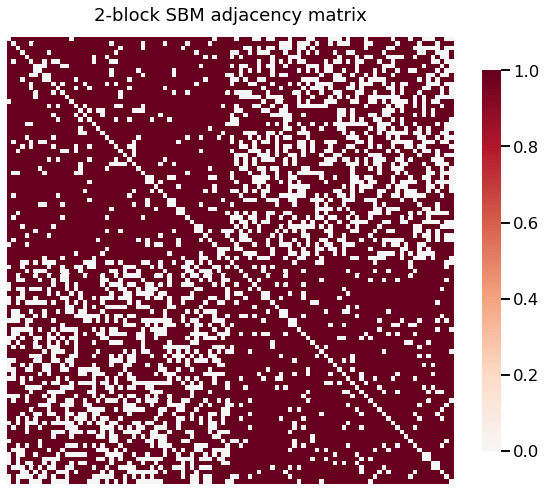

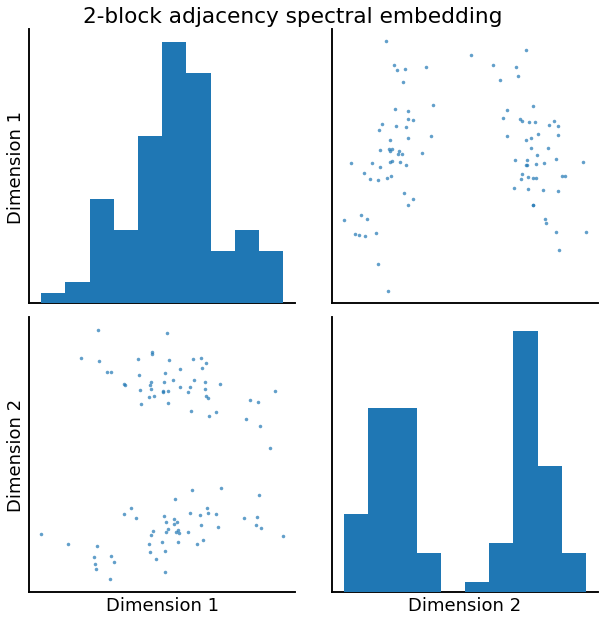

In [8]:
n_components = 2 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.6],
              [0.6, 0.9]])
csize = [50] * 2
A1 = sbm(csize, P)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
heatmap(A1, title='2-block SBM adjacency matrix')
pairplot(X1, title='2-block adjacency spectral embedding', height=4.5)

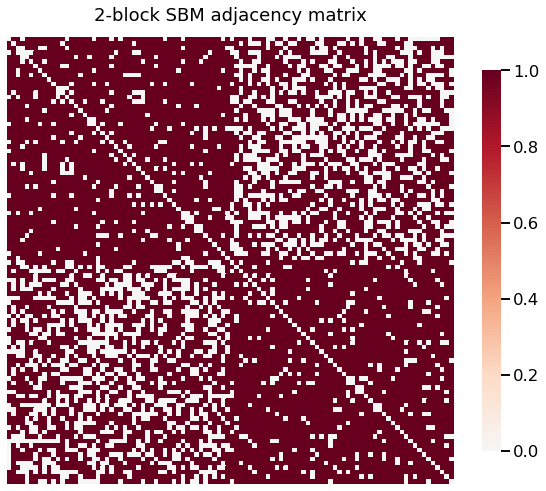

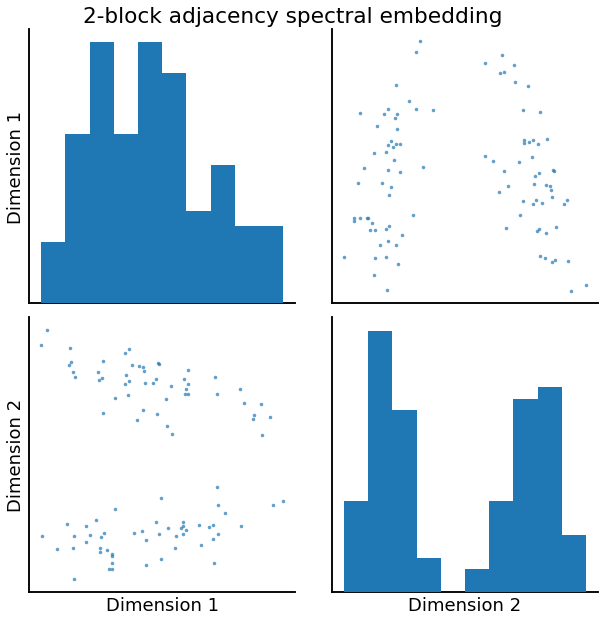

In [9]:
A2 = sbm(csize, P)
X2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

A1 = sbm(csize, P)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
heatmap(A2, title='2-block SBM adjacency matrix')
pairplot(X2, title='2-block adjacency spectral embedding', height=4.5)

In [10]:
ldt_dcorr = LatentDistributionTest("dcorr", metric="euclidean", n_bootstraps=100)
ldt_dcorr.fit(A1, A2)

C:\Users\dfran\Miniconda3\envs\ndd\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       test=<hyppo.ksample.ksamp.KSample object at 0x0000028ED71E4640>)

In [11]:
ldt_mgc = LatentDistributionTest("mgc", metric="euclidean", n_bootstraps=100)
ldt_mgc.fit(A1, A2)

C:\Users\dfran\Miniconda3\envs\ndd\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       test=<hyppo.ksample.ksamp.KSample object at 0x0000028ED8573F40>)

In [13]:
print(ldt_dcorr.p_value_, ldt_mgc.p_value_)

1.0 1.0


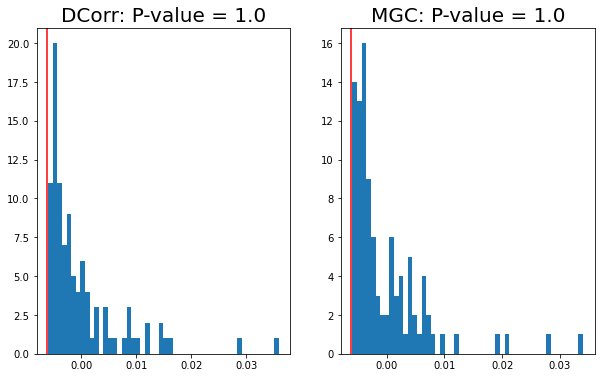

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50)
ax[0].axvline(ldt_dcorr.sample_T_statistic_, color='r')
ax[0].set_title("DCorr: P-value = {}".format(ldt_dcorr.p_value_), fontsize=20)
ax[1].hist(ldt_mgc.null_distribution_, 50)
ax[1].axvline(ldt_mgc.sample_T_statistic_, color='r')
ax[1].set_title("MGC: P-value = {}".format(ldt_mgc.p_value_), fontsize=20)
plt.show();

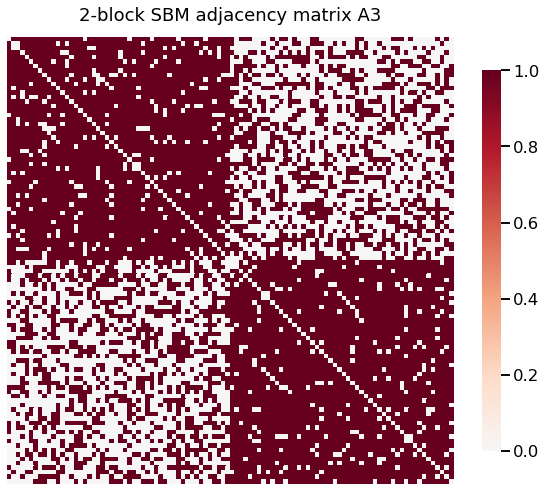

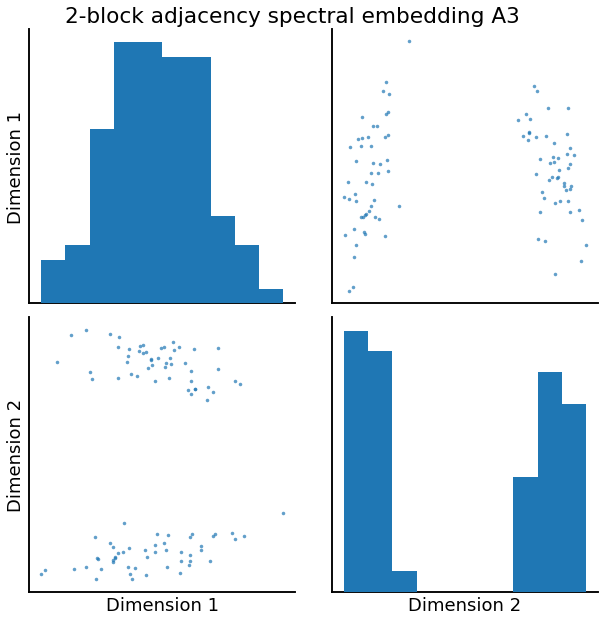

In [15]:
P2 = np.array([[0.9, 0.4],
               [0.4, 0.9]])

A3 = sbm(csize, P2)
heatmap(A3, title='2-block SBM adjacency matrix A3')
X3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A3)
pairplot(X3, title='2-block adjacency spectral embedding A3', height=4.5)

In [16]:
ldt_dcorr = LatentDistributionTest("dcorr", metric="euclidean", n_bootstraps=100)
ldt_dcorr.fit(A1, A3)

C:\Users\dfran\Miniconda3\envs\ndd\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       test=<hyppo.ksample.ksamp.KSample object at 0x0000028ED7D2C310>)

In [17]:
ldt_mgc = LatentDistributionTest("mgc", metric="euclidean", n_bootstraps=100)
ldt_mgc.fit(A1, A3)

C:\Users\dfran\Miniconda3\envs\ndd\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       test=<hyppo.ksample.ksamp.KSample object at 0x0000028ED863AFD0>)

In [18]:
print(ldt_dcorr.p_value_, ldt_mgc.p_value_)

0.02 0.01


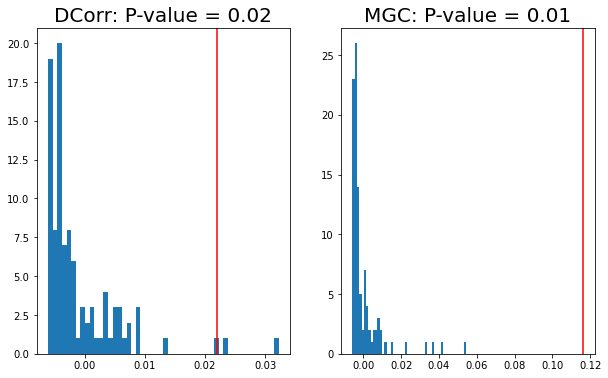

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50)
ax[0].axvline(ldt_dcorr.sample_T_statistic_, color='r')
ax[0].set_title("DCorr: P-value = {}".format(ldt_dcorr.p_value_), fontsize=20)
ax[1].hist(ldt_mgc.null_distribution_, 50)
ax[1].axvline(ldt_mgc.sample_T_statistic_, color='r')
ax[1].set_title("MGC: P-value = {}".format(ldt_mgc.p_value_), fontsize=20)
plt.show();
